In [1]:
# Highlights:
# Feature extraction for model type based on WordCloud
# XGBoost with hyper-parameter tuning

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

from wordcloud import WordCloud, STOPWORDS

# from jupyterthemes import jtplot
# jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.

### Data Load, Cleanup & EDA

In [3]:
df = pd.read_csv('../../Github/python-data-science/data/cars_data.csv')

In [4]:
df.head()

Make           Model   Type Origin DriveTrain     MSRP  Invoice  \
0  Acura             MDX    SUV   Asia        All  $36,945  $33,337   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  $23,820  $21,761   
2  Acura         TSX 4dr  Sedan   Asia      Front  $26,990  $24,647   
3  Acura          TL 4dr  Sedan   Asia      Front  $33,195  $30,299   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  $43,755  $39,014   

   EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0         3.5        6.0         265        17           23    4451   
1         2.0        4.0         200        24           31    2778   
2         2.4        4.0         200        22           29    3230   
3         3.2        6.0         270        20           28    3575   
4         3.5        6.0         225        18           24    3880   

   Wheelbase  Length  
0        106     189  
1        101     172  
2        105     183  
3        108     186  
4        115     197

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [6]:
df.isna().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [7]:
df[df['Cylinders'].isna()]

Make               Model    Type Origin DriveTrain     MSRP  Invoice  \
247  Mazda  RX-8 4dr automatic  Sports   Asia       Rear  $25,700  $23,794   
248  Mazda     RX-8 4dr manual  Sports   Asia       Rear  $27,200  $25,179   

     EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
247         1.3        NaN         197        18           25    3053   
248         1.3        NaN         238        18           24    3029   

     Wheelbase  Length  
247        106     174  
248        106     174

In [8]:
df[(df['Make'] == 'Mazda') & (df['Model'].str.contains('RX-8 4dr')) & (df['EngineSize'] == 1.3)]

Make               Model    Type Origin DriveTrain     MSRP  Invoice  \
247  Mazda  RX-8 4dr automatic  Sports   Asia       Rear  $25,700  $23,794   
248  Mazda     RX-8 4dr manual  Sports   Asia       Rear  $27,200  $25,179   

     EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
247         1.3        NaN         197        18           25    3053   
248         1.3        NaN         238        18           24    3029   

     Wheelbase  Length  
247        106     174  
248        106     174

In [9]:
df[(df['Make'] == 'Mazda') & (df['Model'].str.contains('RX-8 4dr'))]

Make               Model    Type Origin DriveTrain     MSRP  Invoice  \
247  Mazda  RX-8 4dr automatic  Sports   Asia       Rear  $25,700  $23,794   
248  Mazda     RX-8 4dr manual  Sports   Asia       Rear  $27,200  $25,179   

     EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
247         1.3        NaN         197        18           25    3053   
248         1.3        NaN         238        18           24    3029   

     Wheelbase  Length  
247        106     174  
248        106     174

In [10]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    object 
 6   Invoice      426 non-null    object 
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 53.2+ KB


In [11]:
df['MSRP'] = df['MSRP'].str.replace('$','').str.replace(',','').astype(int)

In [12]:
df['Invoice'] = df['Invoice'].str.replace('$','').str.replace(',','').astype(int)

In [13]:
df[['MSRP', 'Invoice']].describe()

MSRP        Invoice
count     426.000000     426.000000
mean    32804.549296   30040.654930
std     19472.460825   17679.430122
min     10280.000000    9875.000000
25%     20324.750000   18836.000000
50%     27807.500000   25521.500000
75%     39225.000000   35754.750000
max    192465.000000  173560.000000

<Figure size 1080x216 with 0 Axes>

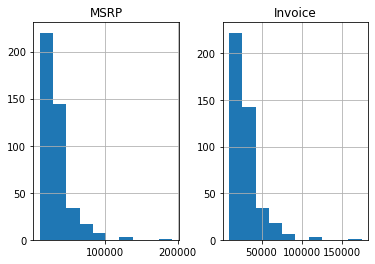

In [14]:
plt.figure(figsize=(15,3))
df[['MSRP', 'Invoice']].hist();

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    int32  
 6   Invoice      426 non-null    int32  
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int32(2), int64(6), object(5)
memory usage: 49.9+ KB


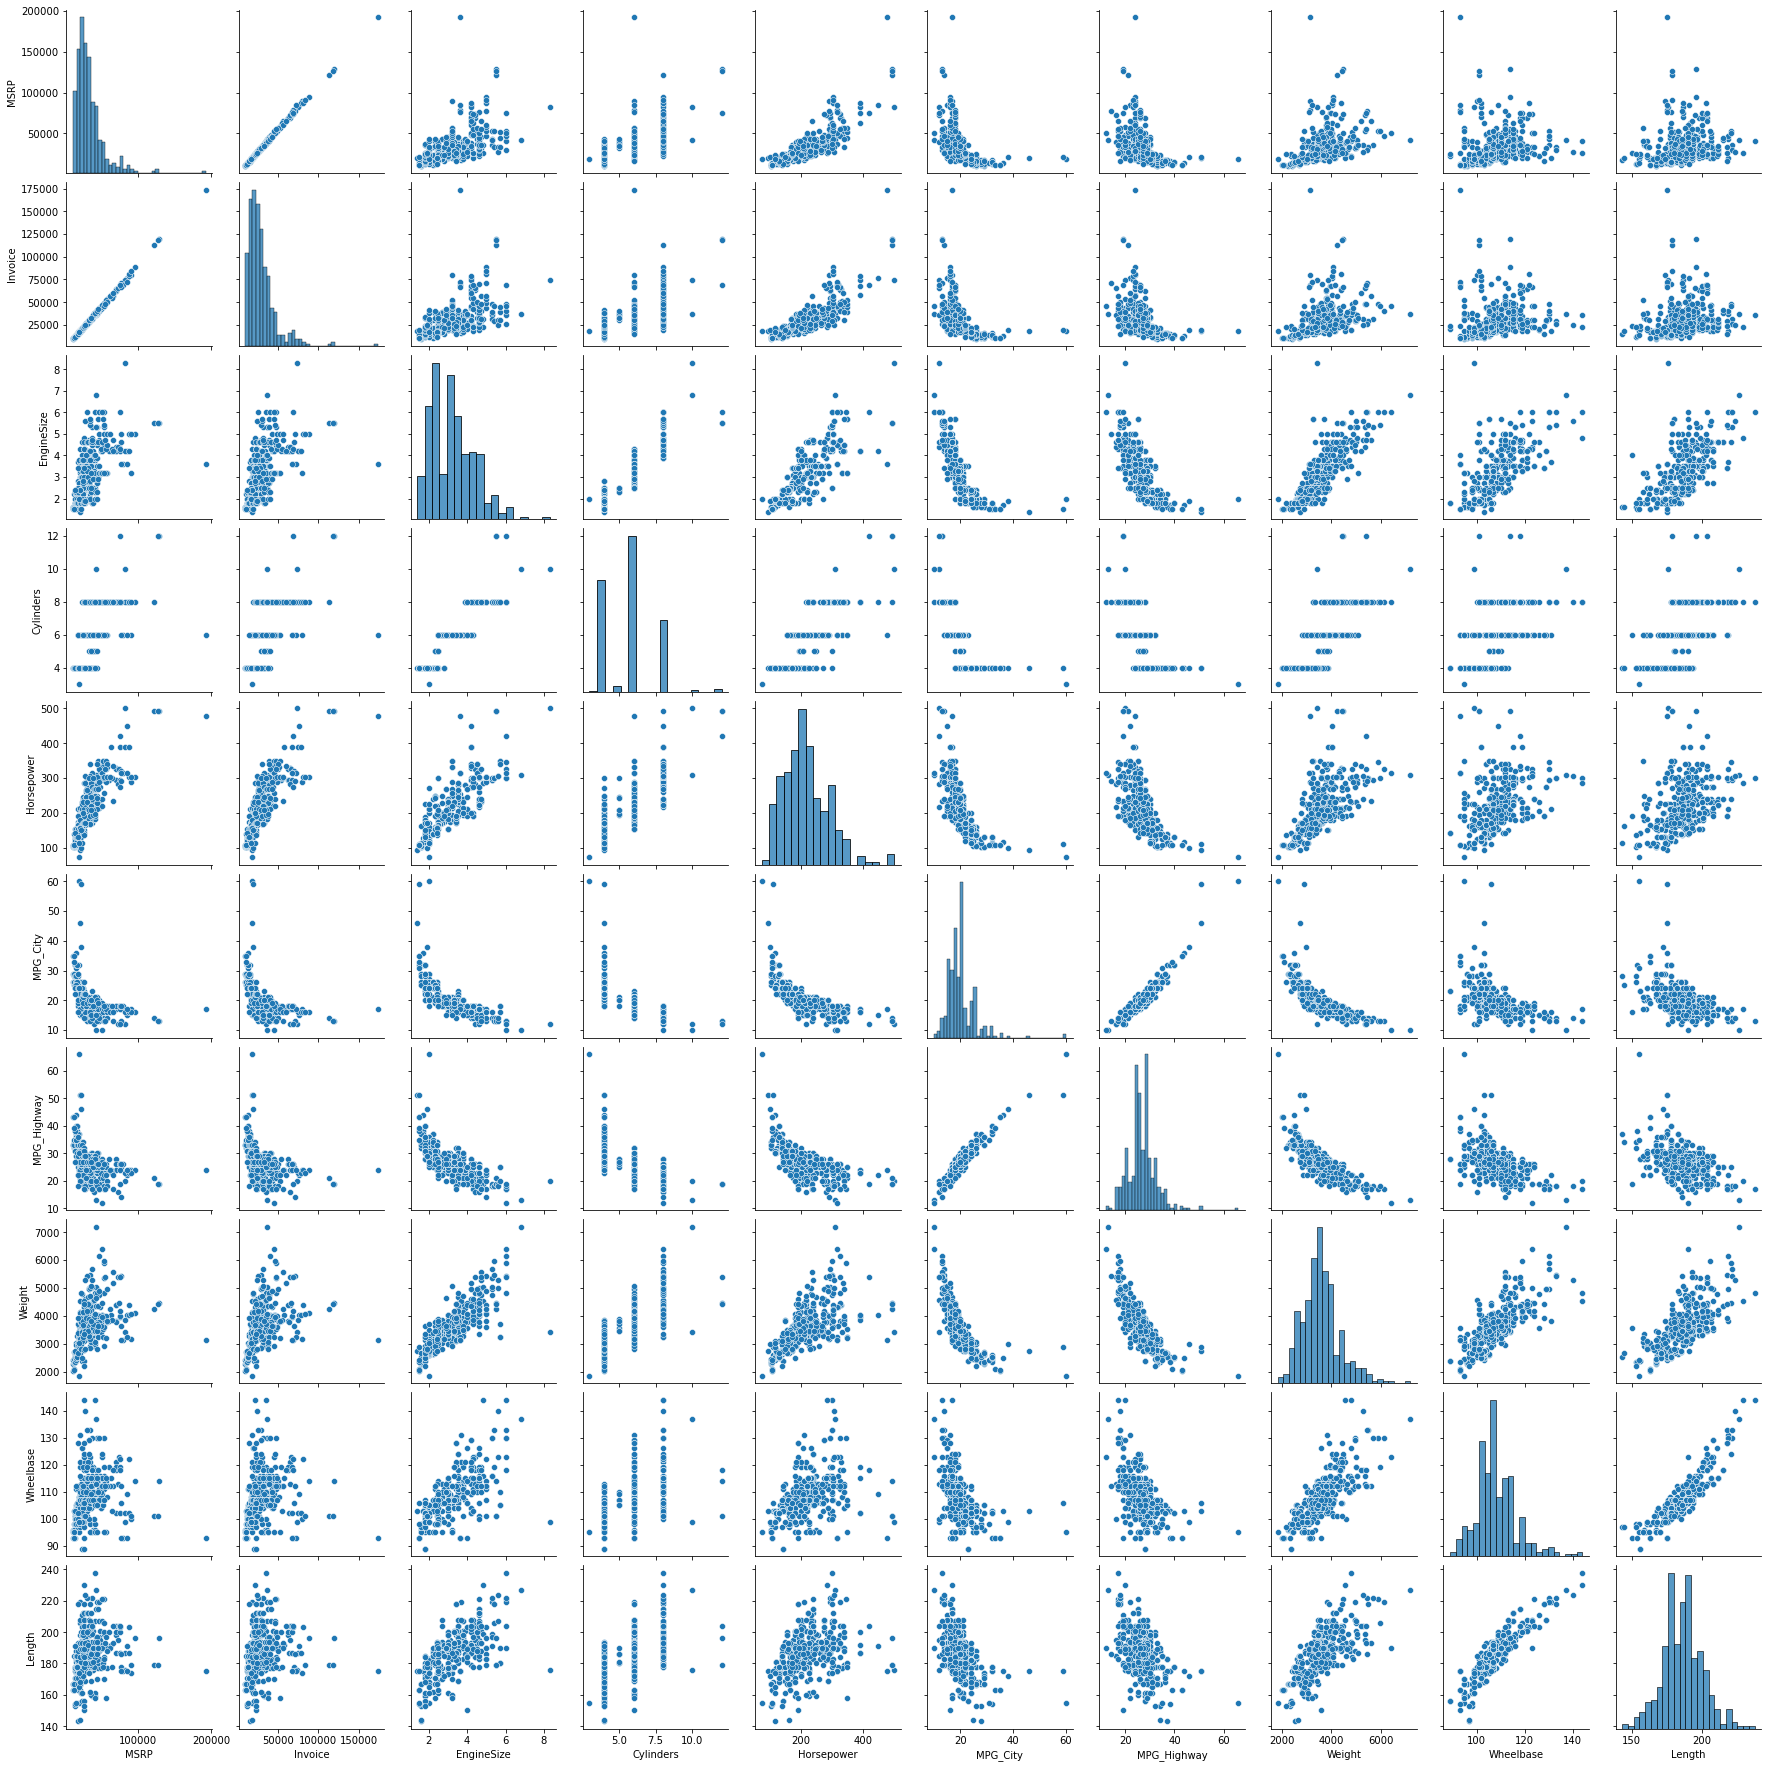

In [16]:
sns.pairplot(df)

In [17]:
px.histogram(data_frame=df, x='Make',
             labels = {"Make":"Manufacturer"}, #replaces the word 'make' with 'manufacturer'
             title = "MAKE OF THE CAR",
             color = 'Type',
#              color_discrete_sequence = ["maroon"],
            )

In [18]:
df['Type'].value_counts(),df['DriveTrain'].value_counts()

(Sedan     262
 SUV        60
 Sports     47
 Wagon      30
 Truck      24
 Hybrid      3
 Name: Type, dtype: int64,
 Front    226
 Rear     108
 All       92
 Name: DriveTrain, dtype: int64)

In [19]:
typedf = df.groupby(by=['Make', 'Type'])['Model'].count().unstack().fillna('')
typedf

Type          Hybrid SUV Sedan Sports Truck Wagon
Make                                             
Acura                  1     5      1            
Audi                        13      4           2
BMW                    2    13      4           1
Buick                  2     7                   
Cadillac               2     4      1     1      
Chevrolet              4    15      2     5     1
Chrysler                    13      1           1
Dodge                  1     8      1     3      
Ford                   4    11      3     3     2
GMC                    3     1            4      
Honda              2   3    11      1            
Hummer                 1                         
Hyundai                1    10      1            
Infiniti                     6                  2
Isuzu                  2                         
Jaguar                       8      4            
Jeep                   3                         
Kia                    1     9                  1
Land Rover             3                         
Lexus                  3     6      1           1
Lincoln                2     7                   
MINI                         2                   
Mazda                  1     4      2     2      
Mercedes-Benz          2    16      5           3
Mercury                1     7                  1
Mitsubishi             3     6      3           1
Nissan                 3     9      2     2     1
Oldsmobile                   3                   
Pontiac                1     8      1           1
Porsche                1            6            
Saab                         6                  1
Saturn                 1     6                  1
Scion                        1                  1
Subaru                       6      2     1     2
Suzuki                 2     5                  1
Toyota             1   5    16      2     3     1
Volkswagen             1    11                  3
Volvo                  1     9                  2

In [20]:
typedf[typedf['Hybrid'] != '']

Type   Hybrid SUV Sedan Sports Truck Wagon
Make                                      
Honda       2   3    11      1            
Toyota      1   5    16      2     3     1

In [21]:
text = df['Model'].values

In [22]:
text = str(text)
text[0:20]

"['MDX' 'RSX Type S 2"

In [23]:
text = text.replace("'",'').replace('[','').replace(']','').replace('"','')
text[0:20]

'MDX RSX Type S 2dr T'

In [24]:
type(STOPWORDS)

set

In [25]:
list(STOPWORDS)[0:10]

['was',
 'having',
 'those',
 'into',
 'they',
 'from',
 'down',
 'since',
 'then',
 'most']

In [26]:
wc = WordCloud(background_color = 'black', max_words=2000, max_font_size=100, random_state=3, stopwords = STOPWORDS, 
               contour_width=3).generate(text)

In [27]:
type(wc)

wordcloud.wordcloud.WordCloud

(-0.5, 399.5, 199.5, -0.5)

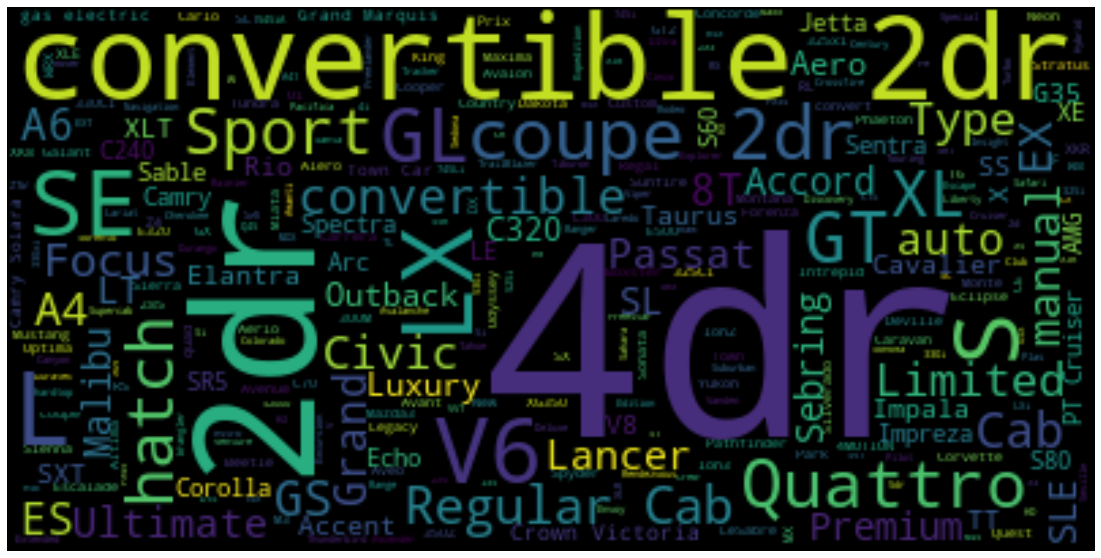

In [28]:
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

In [29]:
wc.words_

{'4dr': 1.0,
 '2dr': 0.24102564102564103,
 'convertible 2dr': 0.17435897435897435,
 'L': 0.1282051282051282,
 'LX': 0.11282051282051282,
 'SE': 0.09743589743589744,
 'V6': 0.09743589743589744,
 'S': 0.09230769230769231,
 'GL': 0.06666666666666667,
 'coupe 2dr': 0.06666666666666667,
 'GT': 0.06153846153846154,
 'Quattro': 0.05641025641025641,
 'hatch': 0.05128205128205128,
 'Sport': 0.046153846153846156,
 'XL': 0.046153846153846156,
 'Regular Cab': 0.041025641025641026,
 'convertible': 0.035897435897435895,
 'GS': 0.035897435897435895,
 'Cab': 0.035897435897435895,
 'Type': 0.03076923076923077,
 'manual': 0.03076923076923077,
 'A4': 0.03076923076923077,
 'Limited': 0.03076923076923077,
 'Focus': 0.03076923076923077,
 'Civic': 0.03076923076923077,
 'EX': 0.03076923076923077,
 '8T': 0.02564102564102564,
 'auto': 0.02564102564102564,
 'A6': 0.02564102564102564,
 'ES': 0.02564102564102564,
 'Grand': 0.02564102564102564,
 'Ultimate': 0.02564102564102564,
 'Lancer': 0.02564102564102564,
 'Pas

In [30]:
pd.DataFrame(wc.words_.values(), index=wc.words_.keys()).head(10)

0
4dr              1.000000
2dr              0.241026
convertible 2dr  0.174359
L                0.128205
LX               0.112821
SE               0.097436
V6               0.097436
S                0.092308
GL               0.066667
coupe 2dr        0.066667

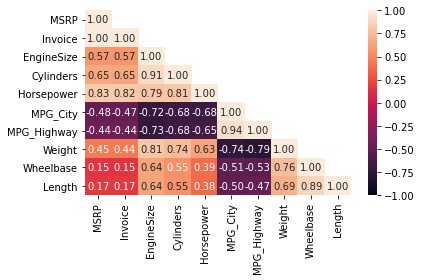

In [31]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', mask=np.triu(np.ones(df.corr().shape), k=1), vmax=1, vmin=-1)
plt.tight_layout()

### Data Prep for Modeling

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
df.head()

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [34]:
df['4dr'] = df['Model'].str.contains('4dr').astype(int)
df['2dr'] = df['Model'].str.contains('2dr').astype(int)
df['Convertible'] = df['Model'].str.contains('convertible ').astype(int)

In [35]:
df.head()

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  \
0        6.0         265        17           23    4451        106     189   
1        4.0         200        24           31    2778        101     172   
2        4.0         200        22           29    3230        105     183   
3        6.0         270        20           28    3575        108     186   
4        6.0         225        18           24    3880        115     197   

   4dr  2dr  Convertible  
0    0    0            0  
1    0    1            0  
2    1    0            0  
3    1    0            0  
4    1    0            0

In [36]:
np.corrcoef(df['MSRP'], df['Invoice'])

array([[1.        , 0.99913155],
       [0.99913155, 1.        ]])

In [37]:
df_dum = pd.get_dummies(df, columns=['Make', 'Type', 'Origin', 'DriveTrain'])
df_dum.shape

(426, 64)

In [38]:
df_dum.head()

Model   MSRP  Invoice  EngineSize  Cylinders  Horsepower  \
0             MDX  36945    33337         3.5        6.0         265   
1  RSX Type S 2dr  23820    21761         2.0        4.0         200   
2         TSX 4dr  26990    24647         2.4        4.0         200   
3          TL 4dr  33195    30299         3.2        6.0         270   
4      3.5 RL 4dr  43755    39014         3.5        6.0         225   

   MPG_City  MPG_Highway  Weight  Wheelbase  ...  Type_Sedan  Type_Sports  \
0        17           23    4451        106  ...           0            0   
1        24           31    2778        101  ...           1            0   
2        22           29    3230        105  ...           1            0   
3        20           28    3575        108  ...           1            0   
4        18           24    3880        115  ...           1            0   

   Type_Truck  Type_Wagon  Origin_Asia  Origin_Europe  Origin_USA  \
0           0           0            1              0           0   
1           0           0            1              0           0   
2           0           0            1              0           0   
3           0           0            1              0           0   
4           0           0            1              0           0   

   DriveTrain_All  DriveTrain_Front  DriveTrain_Rear  
0               1                 0                0  
1               0                 1                0  
2               0                 1                0  
3               0                 1                0  
4               0                 1                0  

[5 rows x 64 columns]

In [39]:
X = df_dum.drop(columns=['MSRP', 'Invoice', 'Model'])
y = df_dum['MSRP']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
print(X_train.shape, X_test.shape)

(340, 61) (86, 61)


In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 66 to 102
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EngineSize          340 non-null    float64
 1   Cylinders           340 non-null    float64
 2   Horsepower          340 non-null    int64  
 3   MPG_City            340 non-null    int64  
 4   MPG_Highway         340 non-null    int64  
 5   Weight              340 non-null    int64  
 6   Wheelbase           340 non-null    int64  
 7   Length              340 non-null    int64  
 8   4dr                 340 non-null    int32  
 9   2dr                 340 non-null    int32  
 10  Convertible         340 non-null    int32  
 11  Make_Acura          340 non-null    uint8  
 12  Make_Audi           340 non-null    uint8  
 13  Make_BMW            340 non-null    uint8  
 14  Make_Buick          340 non-null    uint8  
 15  Make_Cadillac       340 non-null    uint8  
 16  Make_Ch

### Modeling

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### Linear Regression

In [44]:
df['MSRP'].std()

19472.460824907685

In [45]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
print('RMSE : {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('MAE : {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('R2 : {:.2f}'.format(r2_score(y_test, y_pred)))

RMSE : 7035.11
MAE : 5411.41
R2 : 0.84


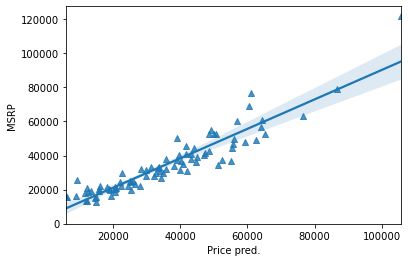

In [46]:
sns.regplot(x=y_pred, y=y_test, marker='^').set_xlabel('Price pred.');

#### Decision Tree / Random Forest

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('RMSE : {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('MAE : {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('R2 : {:.2f}'.format(r2_score(y_test, y_pred)))

RMSE : 7726.26
MAE : 4928.74
R2 : 0.81


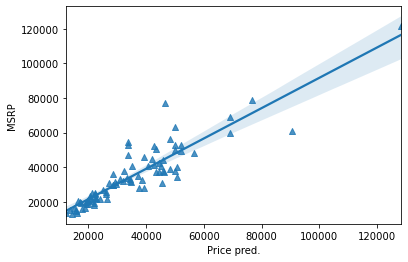

In [49]:
sns.regplot(x=y_pred, y=y_test, marker='^').set_xlabel('Price pred.');

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print('RMSE : {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('MAE : {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('R2 : {:.2f}'.format(r2_score(y_test, y_pred)))

RMSE : 6372.84
MAE : 4171.18
R2 : 0.87


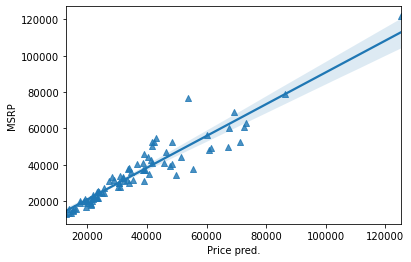

In [52]:
sns.regplot(x=y_pred, y=y_test, marker='^').set_xlabel('Price pred.');

### XGBoost

In [53]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [54]:
xgbm = xgb.XGBRegressor(learning_rate=0.01, n_estimators=1000)
xgbm

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.01, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [55]:
xgbm.fit(X_train, y_train)
y_pred = xgbm.predict(X_test)
print('RMSE : {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('MAE : {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('R2 : {:.2f}'.format(r2_score(y_test, y_pred)))

RMSE : 6129.21
MAE : 3821.41
R2 : 0.88


C:\Users\uditg\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



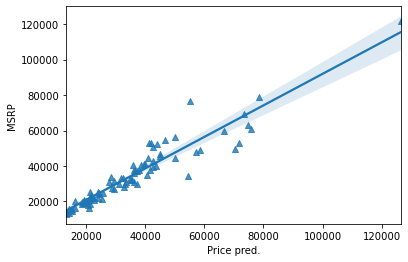

In [56]:
sns.regplot(x=y_pred, y=y_test, marker='^').set_xlabel('Price pred.');

In [57]:
param_grid = {'learning_rate':[.01, .1, 1],
              'n_estimators':[100,500,1000],
              'max_depth':[3, 6, 9, 12],
              }
grm = GridSearchCV(xgbm, param_grid, n_jobs=-1, cv=5)
grm.fit(X_train, y_train)
grm.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

In [58]:
param_grid = {'learning_rate':[.1],
              'n_estimators':[500, 1000],
              'max_depth':[2, 3, 4],
              }
grm = GridSearchCV(xgbm, param_grid, n_jobs=-1, cv=5)
grm.fit(X_train, y_train)
grm.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

In [59]:
y_pred = grm.predict(X_test)
print('RMSE : {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('MAE : {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('R2 : {:.2f}'.format(r2_score(y_test, y_pred)))

RMSE : 5114.62
MAE : 3346.47
R2 : 0.92


C:\Users\uditg\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



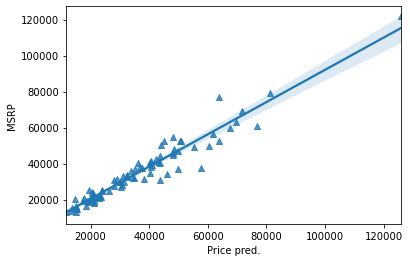

In [60]:
sns.regplot(x=y_pred, y=y_test, marker='^').set_xlabel('Price pred.');

In [61]:
param_grid = {'subsample':[0.3, 0.6, 0.9],
              'colsample_bynode':[0.4, 0.6, 0.8], 
              'learning_rate': [0.1],
              'max_depth': [3],
              'n_estimators': [500],              
              }
grm = GridSearchCV(xgbm, param_grid, n_jobs=-1, cv=5)
grm.fit(X_train, y_train)
grm.best_params_

{'colsample_bynode': 0.8,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 0.6}

In [62]:
param_grid = {'subsample':[0.5, 0.6, 0.7],
              'colsample_bynode':[0.7, 0.8, 0.9], 
              'learning_rate': [0.1],
              'max_depth': [3],
              'n_estimators': [500],              
              }
grm = GridSearchCV(xgbm, param_grid, n_jobs=-1, cv=5)
grm.fit(X_train, y_train)
grm.best_params_

{'colsample_bynode': 0.9,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 0.7}

In [63]:
param_grid = {'subsample':[0.7],
              'colsample_bynode':[1.0], 
              'learning_rate': [0.1],
              'max_depth': [3],
              'n_estimators': [500],              
              }
grm = GridSearchCV(xgbm, param_grid, n_jobs=-1, cv=5)
grm.fit(X_train, y_train)
print(grm.best_params_)

y_pred = grm.predict(X_test)
print('RMSE : {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('MAE : {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('R2 : {:.2f}'.format(r2_score(y_test, y_pred)))

{'colsample_bynode': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.7}
RMSE : 4852.06
MAE : 3213.73
R2 : 0.92


C:\Users\uditg\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

